In [40]:
import numpy as np
import pandas as pd
import scanpy as sc
import pickle as pkl

from scipy.stats import mannwhitneyu

import seaborn as sb
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [20]:
path_data='/om2/user/khrovati/data/cross_system_integration/'
path_names=path_data+'names_parsed/'
path_fig=path_data+'figures/'

In [21]:
# Names
model_map=pkl.load(open(path_names+'models.pkl','rb'))
param_map=pkl.load(open(path_names+'params.pkl','rb'))
metric_map=pkl.load(open(path_names+'metrics.pkl','rb'))
# Here NMI fixed is used
metric_map=dict([(k,v) if k!='nmi_opt' else ('nmi','NMI fixed') for k,v in metric_map.items() ])
dataset_map=pkl.load(open(path_names+'datasets.pkl','rb'))
metric_meaning_map=pkl.load(open(path_names+'metric_meanings.pkl','rb'))
metric_meaning_map['nmi']=metric_meaning_map['nmi_opt']
metric_map_rev=dict(zip(metric_map.values(),metric_map.keys()))
dataset_map_rev=dict(zip(dataset_map.values(),dataset_map.keys()))
system_map=pkl.load(open(path_names+'systems.pkl','rb'))
params_opt_map=pkl.load(open(path_names+'params_opt_model.pkl','rb'))
params_opt_gene_map=pkl.load(open(path_names+'params_opt_genes.pkl','rb'))
param_opt_vals=pkl.load(open(path_names+'optimized_parameter_values.pkl','rb'))
cell_type_map=pkl.load(open(path_names+'cell_types.pkl','rb'))

# cmap
model_cmap=pkl.load(open(path_names+'model_cmap.pkl','rb'))
obs_col_cmap=pkl.load(open(path_names+'obs_col_cmap.pkl','rb'))
metric_background_cmap=pkl.load(open(path_names+'metric_background_cmap.pkl','rb'))
metric_background_cmap['nmi']=metric_background_cmap['nmi_opt']

In [30]:
# Load results
dataset_metric_fns={
    'pancreas_conditions_MIA_HPAP2':'combined_orthologuesHVG',
    'retina_adult_organoid':'combined_HVG',
    'adipose_sc_sn_updated':'adiposeHsSAT_sc_sn',
}
res={}
for dataset,fn_part in dataset_metric_fns.items():
    res[dataset]=pkl.load(open(f'{path_data}{dataset}/{fn_part}_embed_integrationMetrics.pkl','rb'
                              ))['asw_batch']['asw_data_label'].values

In [31]:
# Make DF from results for plotting/analysis
score_name='ASW system'
ds_name='Dataset'
res=pd.Series(res).explode().rename(score_name).reset_index().rename({'index':'dataset'},axis=1)
res[ds_name]=res['dataset'].map(dataset_map)

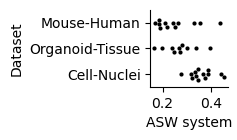

In [39]:
fig,ax=plt.subplots(figsize=(1,1))
sb.swarmplot(x=score_name,y=ds_name,data=res,s=3,c='k')
ax.set(facecolor = (0,0,0,0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)           
fig.set(facecolor = (0,0,0,0))
plt.subplots_adjust( wspace=0.1)

plt.savefig(path_fig+'batch_strength_datasets-asw_label-swarm.pdf',
            dpi=300,bbox_inches='tight')
plt.savefig(path_fig+'batch_strength_datasets-asw_label-swarm.png',
            dpi=300,bbox_inches='tight')

In [50]:
dss=sorted(res['dataset'].unique())
for i in range(len(dss)-1):
    for j in range(i+1,len(dss)):
        ds_i=dss[i]
        ds_j=dss[j]
        u,p=mannwhitneyu(
            res.query('dataset==@ds_i')[score_name].astype(float), 
            res.query('dataset==@ds_j')[score_name].astype(float))
        print(ds_i,'VS',ds_j)
        print(f'p-value = {p:.1e} u={u}')

adipose_sc_sn_updated VS pancreas_conditions_MIA_HPAP2
p-value = 2.1e-03 u=135.0
adipose_sc_sn_updated VS retina_adult_organoid
p-value = 3.9e-03 u=112.0
pancreas_conditions_MIA_HPAP2 VS retina_adult_organoid
p-value = 3.7e-01 u=46.0
